/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/skimage/filters/rank/generic.py:262: UserWarning: Bad rank filter performance is expected due to a large number of bins (10143), equivalent to an approximate bitdepth of 13.3.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,


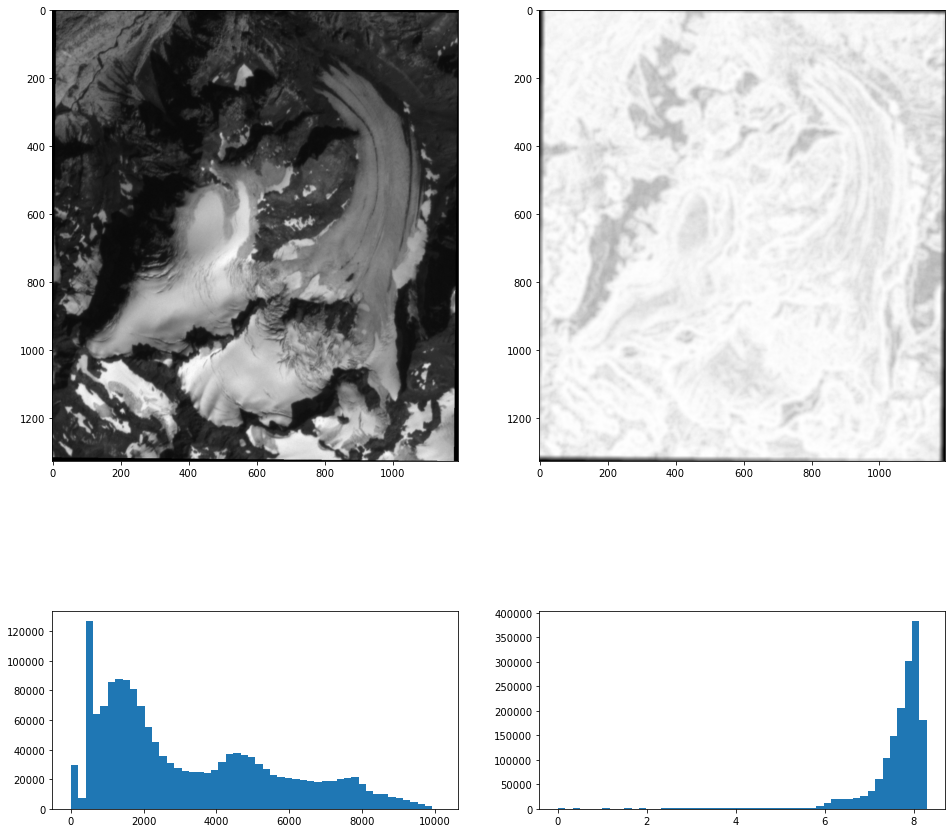

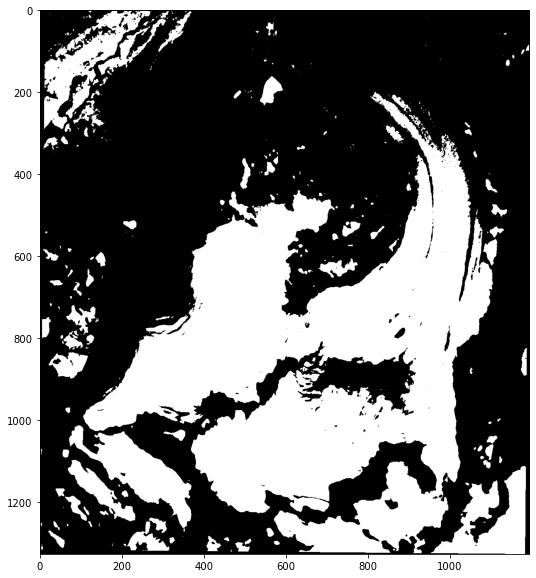

In [2]:
import rasterio as rio
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu

# determine disk size (area around which to assess entropy)
disk_size = 10

im_fn = '/Users/raineyaberle/Research/PhD/Planet_snow_cover/study-sites/Blue/imagery/Planet/adjusted-filtered/20210828_18_adj.tif'
im = rio.open(im_fn)
nir = im.read(4)

# calculate entropy of the image
entropy_im = entropy(nir, disk(disk_size))

# plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,16), gridspec_kw={'height_ratios': [3, 1]})
ax1.imshow(nir, cmap=plt.cm.gray)
ax2.imshow(entropy_im, cmap=plt.cm.gray)
ax3.hist(nir.flatten(), bins=50)
ax4.hist(entropy_im.flatten(), bins=50)

# create a binary image using an Otsu threshold
thresh = threshold_otsu(nir)
binary = nir > thresh

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(binary, cmap=plt.cm.gray)
plt.show()
